# Association Rule Mining
Nathalia Minoque | nminoque@student.ciputra.ac.id | 0706022010020

Teknologi yang berkembang pesat memberikan dampak yang besar pada banyak sektor dalam kehidupan manusia, salah satunya adalah pada sektor industri. Banyak industri yang saat ini sudah menggunakan teknologi dalam hal pengumpulan dan penyimpanan data. Penyimpanan data secara tradisional dinilai tidak lagi dapat digunakan dalam mengekstrak informasi dari data berukuran besar (Herti Yani & Pareza Alam Jusia, 2018). Akan tetapi, hal ini dapat diatasi dengan adanya penggunaan database. Saat ini banyak industri berusaha mengumpulkan informasi sebanyak-banyaknya dengan tujuan mencari keuntungan yang maksimal (Sofyan, 2019). Salah satu contohnya adalah pada minimarket yang mengumpulkan data transaksi pembeli setiap harinya untuk mengetahui daftar produk apa saja yang dibeli dalam satu kali transaksi pembelian. Kumpulan data transaksi ini tidak akan menghasilkan informasi yang berguna jika dibiarkan begitu saja tanpa adanya pengolahan data lanjutan. Oleh karena itu, diperlukan sebuah aplikasi yang dapat digunakan untuk membantu industri menemukan informasi penting dari database yang sebelumnya hanya digunakan sebagai arsip, yaitu data mining (Rerung, 2018). Data mining adalah suatu istilah yang digunakan untuk menguraikan penemuan pengetahuan di dalam database atau sering disebut Knowledge Discovery in Database (Sofyan, 2019). Salah satu metode yang ada di dalam data mining adalah association rule mining. 

Association rule mining adalah salah satu metode data mining yang dapat mengidentifikasi hubungan kesamaan antar item (Fauzy et al., 2016). Aturan asosiasi terdiri dari dua himpunan item yang disebut antecedent dan consequent. Consequent biasanya dibatasi untuk berisi suatu item tunggal. Bentuk aturan asosiasi adalah “If antecedent, then consequent” (Gibran & Aripin, 2016). Salah satu algoritma yang biasa dipakai adalah algoritma apriori. Algoritma Apriori adalah salah satu algoritma pada data mining untuk mencari frequent item/itemset pada transaksional database (Lismardiana et al., 2019). Kelebihan asosiasi rule dengan apriori ini adalah lebih sederhana dan dapat menangani data yang besar (Fauzy et al., 2016). Langkah-langkah algoritma apriori dijelaskan pada gambar berikut (Lismardiana et al., 2019):

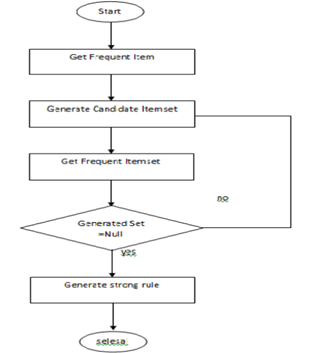

1.	Join (penggabungan), yaitu dengan menggabungkan setiap item dengan item lainnya hinga tidak terbentuk kombinasi lain.
2.	Prune (pemangkasan), yaitu memangkas/menghapus item yang tidak mencapai minimum support tertentu setelah dikombinasikan.


Algoritma apriori umumnya memiliki tiga ukuran kepercayaan atau yang biasa disebut dengan interestingness measure, yaitu (Rerung, 2018):
1.	Support: Suatu ukuran yang menunjukkan seberapa besar tingkat dominasi suatu item/ itemset dari keseluruhan transaksi. Ukuran ini akan menentukan apakah suatu item/itemset layak untuk dicari confidence-nya, seperti dari seluruh transaksi yang ada, seberapa besar tingkat dominasi yang menunjukkan bahwa item A dan B dibeli bersamaan.
 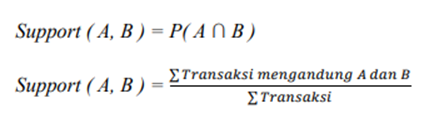

2.	Confidence: Suatu ukuran yang menunjukkan hubungan antar dua item secara conditional, seperti seberapa sering item B dibeli jika orang membeli item A. 
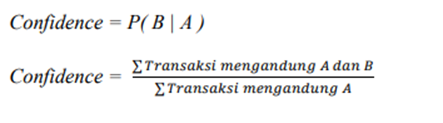

3.	Improvement/Lift Ratio: suatu ukuran untuk mengetahui kekuatan aturan asosisasi yang telah terbentuk. Nilai lift ratio biasanya digunakan sebagai penentu apakah aturan asosiasi valid atau tidak (Fauzy et al., 2016). Rule dianggap bersifat kuat dan valid jika memiliki nilai lebih besar dari 1 (lift ratio >1) (Fauzy et al., 2016). 
 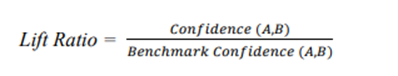


Ketiga ukuran ini nantinya akan berguna dalam menentukan interesting association rules, yaitu untuk dibandingkan dengan threshold (batasan) yang ditentukan (Rerung, 2018). Batasan tersebut umumnya terdiri dari min_support, min_cofidence, dan min_improvement. dimana hal tersebut ditempuh dengan cara sebagai berikut (Sofyan, 2019):
1.	Mencari semua frequent itemset, yaitu itemset yang merupakan himpunan kombinasi produk yang akan dibeli dengan nilai support ≥ minimum support yang merupakan ambang batas yang diberikan oleh user.
2.	Mencari aturan asosiasi yang confidence dari frequent itemset yang didapatkan.
3.	Mencari rule-rule yang sesuai dengan target user yang didapat dari proses association rule mining sebelumnya. Rule-rule ini mendeskripsikan kombinasi itemset yang dijadikan pertimbangan di dalam membuat kesimpulan.
 

Salah satu implementasi dari asosiasi adalah market basket analysis (Rerung, 2018). Market Basket Analysis adalah analisis dari kebiasaan membeli customer dengan mencari asosiasi dan korelasi antara item-item berbeda yang diletakkan customer dalam keranjang belanjaannya (Gibran & Aripin, 2016). Hal ini dapat dijadikan dasar pengambilan keputusan dalam penataan barang di supermarket ataupun dalam pemberian promo produk.

# Implementasi menggunakan Python

(Torkan, 2020)

In [9]:
!pip install mlxtend
import pandas as pd
import numpy as np
from mlxtend.frequent_patterns import apriori, association_rules

  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.24.1
    Uninstalling scikit-learn-0.24.1:
      Successfully uninstalled scikit-learn-0.24.1


In [10]:
# load dataset
df = pd.read_csv('https://raw.githubusercontent.com/NathaliaMinoque/datamining/main/GroceryStoreDataSet.csv', names = ['products'], sep = ',')
df.head()

C:\Users\User\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,products
0,"MILK,BREAD,BISCUIT"
1,"BREAD,MILK,BISCUIT,CORNFLAKES"
2,"BREAD,TEA,BOURNVITA"
3,"JAM,MAGGI,BREAD,MILK"
4,"MAGGI,TEA,BISCUIT"


In [11]:
# Melihat shape dataset
df.shape

C:\Users\User\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(20, 1)

In [12]:
# split products dan memasukkan ke dalam list
data = list(df["products"].apply(lambda x:x.split(",") ))
data

C:\Users\User\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[['MILK', 'BREAD', 'BISCUIT'],
 ['BREAD', 'MILK', 'BISCUIT', 'CORNFLAKES'],
 ['BREAD', 'TEA', 'BOURNVITA'],
 ['JAM', 'MAGGI', 'BREAD', 'MILK'],
 ['MAGGI', 'TEA', 'BISCUIT'],
 ['BREAD', 'TEA', 'BOURNVITA'],
 ['MAGGI', 'TEA', 'CORNFLAKES'],
 ['MAGGI', 'BREAD', 'TEA', 'BISCUIT'],
 ['JAM', 'MAGGI', 'BREAD', 'TEA'],
 ['BREAD', 'MILK'],
 ['COFFEE', 'COCK', 'BISCUIT', 'CORNFLAKES'],
 ['COFFEE', 'COCK', 'BISCUIT', 'CORNFLAKES'],
 ['COFFEE', 'SUGER', 'BOURNVITA'],
 ['BREAD', 'COFFEE', 'COCK'],
 ['BREAD', 'SUGER', 'BISCUIT'],
 ['COFFEE', 'SUGER', 'CORNFLAKES'],
 ['BREAD', 'SUGER', 'BOURNVITA'],
 ['BREAD', 'COFFEE', 'SUGER'],
 ['BREAD', 'COFFEE', 'SUGER'],
 ['TEA', 'MILK', 'COFFEE', 'CORNFLAKES']]

In [16]:
#Transform list dengan encoding true false menjadi 1 0
from mlxtend.preprocessing import TransactionEncoder
a = TransactionEncoder()
a_data = a.fit(data).transform(data)
df = pd.DataFrame(a_data,columns=a.columns_)
df = df.replace(False,0)
df = df.replace(True,1)
df

C:\Users\User\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,BISCUIT,BOURNVITA,BREAD,COCK,COFFEE,CORNFLAKES,JAM,MAGGI,MILK,SUGER,TEA
0,1,0,1,0,0,0,0,0,1,0,0
1,1,0,1,0,0,1,0,0,1,0,0
2,0,1,1,0,0,0,0,0,0,0,1
3,0,0,1,0,0,0,1,1,1,0,0
4,1,0,0,0,0,0,0,1,0,0,1
5,0,1,1,0,0,0,0,0,0,0,1
6,0,0,0,0,0,1,0,1,0,0,1
7,1,0,1,0,0,0,0,1,0,0,1
8,0,0,1,0,0,0,1,1,0,0,1
9,0,0,1,0,0,0,0,0,1,0,0


In [14]:
#Set threshold value untuk digunakan dalam penghitungan support
df = apriori(df, min_support = 0.2, use_colnames = True, verbose = 1)
df

Processing 42 combinations | Sampling itemset size 3


C:\Users\User\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
C:\Users\User\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.35,(BISCUIT)
1,0.2,(BOURNVITA)
2,0.65,(BREAD)
3,0.4,(COFFEE)
4,0.3,(CORNFLAKES)
5,0.25,(MAGGI)
6,0.25,(MILK)
7,0.3,(SUGER)
8,0.35,(TEA)
9,0.2,"(BREAD, BISCUIT)"


In [15]:
#Set minimum confidence value 60%
df_ar = association_rules(df, metric = "confidence", min_threshold = 0.6)
df_ar

C:\Users\User\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(MILK),(BREAD),0.25,0.65,0.2,0.800000,1.230769,0.0375,1.75
1,(SUGER),(BREAD),0.30,0.65,0.2,0.666667,1.025641,0.0050,1.05
2,(CORNFLAKES),(COFFEE),0.30,0.40,0.2,0.666667,1.666667,0.0800,1.80
3,(SUGER),(COFFEE),0.30,0.40,0.2,0.666667,1.666667,0.0800,1.80
4,(MAGGI),(TEA),0.25,0.35,0.2,0.800000,2.285714,0.1125,3.25


Kesimpulan yang dapat diambil berdasarkan analisis di atas pada index 1 adalah:
1.	Probabilitas penjualan gula adalah 30%
2.	Probabilitas penjualan roti adalah 65%
3.  Probabilitas penjualan gula dan roti adalah 20%
4.  Probabilitas orang yang membeli gula juga memberi roti adalah 67%
5.  Rule Suger -> Bread dianggap valid karena lift ratio mencapai 1.02%

Daftar Pustaka:
    Fauzy, M., Saleh W, K. R., & Asror, I. (2016). Penerapan Metode Association Rule Menggunakan Algoritma Apriori Pada Simulasi Prediksi Hujan Wilayah Kota Bandung. Jurnal Ilmiah Teknologi Infomasi Terapan, 2(3). https://doi.org/10.33197/jitter.vol2.iss3.2016.111
    Gibran, R., & Aripin. (2016). Analisis Aturan Asosiasi Menggunakan Algoritma Apriori Untuk Menentukan Inventori Apotek. UDiNus Repository, 5, 7. https://docplayer.info/47321099-Analisis-aturan-asosiasi-menggunakan-algoritma-apriori-untuk-menentukan-inventori-apotek.html
    Herti Yani, & Pareza Alam Jusia. (2018). Penerapan 3. Association Rule Untuk Mendeskripsikan Pola Hubungan Antara Kota Kelahiran Mahasiswa Dengan Tingkat Kelulusan Mahasiswa Pada Stikom Dinamika Bangsa Jambi. Seminar Nasional Sistem Informasi …, 1097–1104. https://jurnalfti.unmer.ac.id/index.php/senasif/article/download/170/140
    Lismardiana, Mawengkang, H., & Nababan, E. B. (2019). Pengembangan Algoritma Apriori Untuk Pengambilan Keputusan. Keputusan the Development Apriori Algorithm for Decision-, 4(2), 110–121. https://jurnal.kominfo.go.id/index.php/jtik/article/view/823
    Rerung, R. R. (2018). Penerapan Data Mining dengan Memanfaatkan Metode Association Rule untuk Promosi Produk. Jurnal Teknologi Rekayasa, 3(1), 89. https://doi.org/10.31544/jtera.v3.i1.2018.89-98
    Sofyan. (2019). Implementation of Data Mining with Association Rule in Decision Making for Product Purchase Correlation Using the Apriori Algorithm. Journal of Chemical Information and Modeling, 53(9), 1689–1699.
    Torkan, M. (2020, October 16). Association rules with python. Kaggle. Retrieved November 13, 2022, from https://www.kaggle.com/code/mervetorkan/association-rules-with-python 